In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [139]:
 #Constants
discount_rate = 0.07
years = np.arange(1, 11)
base_demand = 1000  # in MW
growth_rate = 0.04
# Carbon price per ton
carbon_price = 1000
# Demand forecast over 10 years
demand = base_demand * (1 + growth_rate) ** years

In [140]:
# Resources Data
resources = {
    'coal':     {'capex': 60000, 'om': 2000, 'fuel': 2500, 'emissions': 1.0, 'cf': 0.85},
    'solar':    {'capex': 40000, 'om': 500,  'fuel': 0,    'emissions': 0.0, 'cf': 0.20},
    'wind':     {'capex': 50000, 'om': 1000, 'fuel': 0,    'emissions': 0.0, 'cf': 0.30},
    'battery':  {'capex': 20000, 'om': 500,  'fuel': 0,    'emissions': 0.0, 'cf': None}  # Assume battery added to enhance mix
}


In [141]:
def npv(costs, r=discount_rate):
    return sum([cost / ((1 + r) ** t) for t, cost in enumerate(costs, start=1)])

In [142]:
# Define resource portfolios (as % of demand)
portfolios = {
    "All Coal": {'coal': 1.0},
    "50% Solar + 50% Coal": {'solar': 0.5, 'coal': 0.5},
    "30% Wind + 30% Solar + 40% Coal": {'wind': 0.3, 'solar': 0.3, 'coal': 0.4}
}

In [143]:
year_emissions_cost= 0.0
emissions_costs = []
for name,mix in portfolios.items():
    annual_cost=[]
    for year, demand_mw in zip(years,demand):
        year_cost=0
        for res,share in mix.items():
            res_mw=share*demand_mw
            res_data=resources[res]
            gen_mwh=res_mw*res_data['cf']*8790 if res_data['cf'] else 0 
            #Annulaized Cost
            capex=res_data['capex']*res_mw
            om=res_data['om']*res_mw
            fuel=res_data['fuel']*res_mw
            
            emissions_cost=res_data['emissions']*gen_mwh*carbon_price
            year_emissions_cost += emissions_cost
            year_cost+=(capex/10)+om+fuel+emissions_cost 
            annual_cost.append(year_cost)
            total_npv = npv(annual_cost)
            print(f"Portfolio: {name} | NPV (10 years): ₹{total_npv/1e7:.2f} Cr")
            emissions_costs.append(year_emissions_cost)
            print(f"Year: {year}, Emissions Cost: ₹ {year_emissions_cost:.2f}")
            
           
            
            

Portfolio: All Coal | NPV (10 years): ₹727.22 Cr
Year: 1, Emissions Cost: ₹ 7770360000.00
Portfolio: All Coal | NPV (10 years): ₹1434.06 Cr
Year: 2, Emissions Cost: ₹ 15851534400.00
Portfolio: All Coal | NPV (10 years): ₹2121.07 Cr
Year: 3, Emissions Cost: ₹ 24255955776.00
Portfolio: All Coal | NPV (10 years): ₹2788.82 Cr
Year: 4, Emissions Cost: ₹ 32996554007.04
Portfolio: All Coal | NPV (10 years): ₹3437.85 Cr
Year: 5, Emissions Cost: ₹ 42086776167.32
Portfolio: All Coal | NPV (10 years): ₹4068.69 Cr
Year: 6, Emissions Cost: ₹ 51540607214.01
Portfolio: All Coal | NPV (10 years): ₹4681.84 Cr
Year: 7, Emissions Cost: ₹ 61372591502.58
Portfolio: All Coal | NPV (10 years): ₹5277.79 Cr
Year: 8, Emissions Cost: ₹ 71597855162.68
Portfolio: All Coal | NPV (10 years): ₹5857.04 Cr
Year: 9, Emissions Cost: ₹ 82232129369.19
Portfolio: All Coal | NPV (10 years): ₹6420.05 Cr
Year: 10, Emissions Cost: ₹ 93291774543.95
Portfolio: 50% Solar + 50% Coal | NPV (10 years): ₹0.22 Cr
Year: 1, Emissions Cos

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

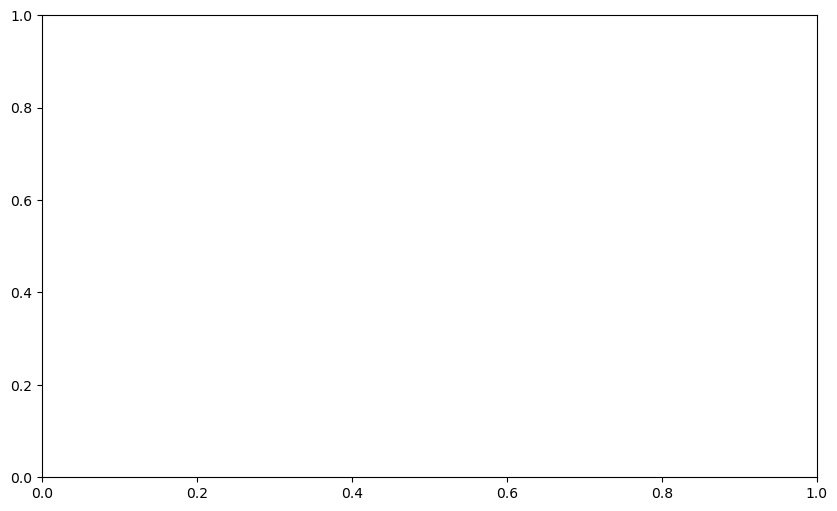

In [144]:
emissions_over_time = {}
emissions_over_time[name] = emissions_cost  # Store emissions costs for plotting
plt.figure(figsize=(10, 6))
for name, costs in emissions_over_time.items():
    plt.plot(years, np.array(costs) / 1e7, label=name, linewidth=2)  # ₹ in crores

plt.xlabel('Year')
plt.ylabel('Emissions Cost (₹ Crores)')
plt.title('Emissions Cost Over 10 Years for Different Portfolios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()